#Exploratory Data Analysis of Obesity Worldwide

#Description

A person is considered obese when their Body Mass Index (BMI) exceeds 30. Some of its contributors are sedentary lifestyles, unhealthy dietary habits, genetic predispositions, and environmental factors. Obesity is associated with a myriad of health issues, including cardiovascular diseases, type 2 diabetes, certain cancers, musculoskeletal disorders, and mental health conditions. Therefore, it can be prevented by promoting healthy lifestyles, including balanced diets and regular physical activity.

This Exploratory Data Analysis(EDA) has the purpose of exploring, analysing, visualizing and gaining substantial insights the "Prevalence of obesity among adults" dataset provided by the Global Health Organization(GHO).

The dataset's headers are Country, year, sex and Obesity(%). The column "Country" has 195 unique values, "year" goes from 1975 to 2016, "sex" has 3 unique values, they are "Male", "Female" and "Both sexes" and the "Obesity(%)" column contains the obese population percentage.

# Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Data wrangling

* Data Collection

In [326]:
df_obesity= pd.read_csv('https://raw.githubusercontent.com/Pinho-11/DataAnalysis_WorldObesity/main/datasets/obesity_csv.csv', sep=';')

In [327]:
df_country = pd.read_csv('https://raw.githubusercontent.com/Pinho-11/DataAnalysis_WorldObesity/main/datasets/country-population-from-1960-to-2018.xls')

In [328]:
df_hunger = pd.read_csv('https://raw.githubusercontent.com/Pinho-11/DataAnalysis_WorldObesity/main/datasets/global-hunger-index.csv')

* Working on Global Hunger Dataframe

In [329]:
df_hunger.head()

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN


In [330]:
df_hunger = df_hunger[['Entity','Year','Global Hunger Index (2021)']]

df_hunger = df_hunger.rename(columns={'Entity':'Country'})

In [331]:
df_hunger.head()

,Country,Year,Global Hunger Index (2021)
0,Afghanistan,2000,50.9
1,Afghanistan,2006,42.7
2,Afghanistan,2012,34.3
3,Afghanistan,2021,28.3
4,Albania,2000,20.7


* Working on Country Population Dataframe

In [332]:
df_country.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0
1,Afghanistan,AFG,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,...,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0
2,Angola,AGO,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,...,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0


In [333]:
df_country = df_country.rename(columns={'Country Name':'Country'}).drop(columns={'Country Code'})

In [334]:
country_map = {'Afghanistan':'Afghanistan','Albania':'Albania','Algeria':'Algeria','Andorra':'Andorra','Angola':'Angola','Antigua and Barbuda':'Antigua and Barbuda','Argentina':'Argentina','Armenia':'Armenia','Australia':'Australia','Austria':'Austria','Azerbaijan':'Azerbaijan','Bahamas':'Bahamas','Bahrain':'Bahrain','Bangladesh':'Bangladesh','Barbados':'Barbados','Belarus':'Belarus','Belgium':'Belgium','Belize':'Belize','Benin':'Benin','Bhutan':'Bhutan','Bosnia and Herzegovina':'Bosnia and Herzegovina','Botswana':'Botswana','Brazil':'Brazil','Brunei Darussalam':'Brunei Darussalam','Bulgaria':'Bulgaria','Burkina Faso':'Burkina Faso','Burundi':'Burundi','Cabo Verde':'Cabo Verde','Cambodia':'Cambodia','Cameroon':'Cameroon','Canada':'Canada','Central African Republic':'Central African Republic','Chad':'Chad','Chile':'Chile','China':'China','Colombia':'Colombia','Comoros':'Comoros','Congo':'Congo','Congo, Dem. Rep.':'Democratic Republic of the Congo','Costa Rica':'Costa Rica','Croatia':'Croatia','Cuba':'Cuba','Cyprus':'Cyprus','Czech Republic':'Czechia','Denmark':'Denmark','Djibouti':'Djibouti','Dominica':'Dominica','Dominican Republic':'Dominican Republic','Ecuador':'Ecuador','Egypt':'Egypt','El Salvador':'El Salvador','Equatorial Guinea':'Equatorial Guinea','Eritrea':'Eritrea','Estonia':'Estonia','Eswatini':'Eswatini','Ethiopia':'Ethiopia','Fiji':'Fiji','Finland':'Finland','France':'France','Gabon':'Gabon','Gambia':'Gambia','Georgia':'Georgia','Germany':'Germany','Ghana':'Ghana','Greece':'Greece','Grenada':'Grenada','Guatemala':'Guatemala','Guinea':'Guinea','Guinea-Bissau':'Guinea-Bissau','Guyana':'Guyana','Haiti':'Haiti','Honduras':'Honduras','Hungary':'Hungary','Iceland':'Iceland','India':'India','Indonesia':'Indonesia','Iran, Islamic Rep.':'Iran (Islamic Republic of)','Iraq':'Iraq','Ireland':'Ireland','Israel':'Israel','Italy':'Italy','Jamaica':'Jamaica','Japan':'Japan','Jordan':'Jordan','Kazakhstan':'Kazakhstan','Kenya':'Kenya','Kiribati':'Kiribati','Korea, Dem. People’s Rep.':'Democratic Peoples Republic of Korea','Korea, Rep.':'Republic of Korea','Kuwait':'Kuwait','Lao PDR':'"Lao Peoples Democratic Republic"','Latvia':'Latvia','Lebanon':'Lebanon','Lesotho':'Lesotho','Liberia':'Liberia','Libya':'Libya','Lithuania':'Lithuania','Luxembourg':'Luxembourg','Madagascar':'Madagascar','Malawi':'Malawi','Malaysia':'Malaysia','Maldives':'Maldives','Mali':'Mali','Malta':'Malta','Marshall Islands':'Marshall Islands','Mauritania':'Mauritania','Mauritius':'Mauritius','Mexico':'Mexico','Micronesia, Fed. Sts.':'Micronesia (Federated States of)','Moldova':'Republic of Moldova','Monaco':'Monaco','Mongolia':'Mongolia','Montenegro':'Montenegro','Morocco':'Morocco','Mozambique':'Mozambique','Myanmar':'Myanmar','Namibia':'Namibia','Nauru':'Nauru','Nepal':'Nepal','Netherlands':'Netherlands','New Zealand':'New Zealand','Nicaragua':'Nicaragua','Niger':'Niger','Nigeria':'Nigeria','North Macedonia':'Republic of North Macedonia','Norway':'Norway','Oman':'Oman','Pakistan':'Pakistan','Palau':'Palau','Panama':'Panama','Papua New Guinea':'Papua New Guinea','Paraguay':'Paraguay','Peru':'Peru','Philippines':'Philippines','Poland':'Poland','Portugal':'Portugal','Qatar':'Qatar','Romania':'Romania','Russian Federation':'Russian Federation','Rwanda':'Rwanda','Samoa':'Samoa','San Marino':'San Marino','Sao Tome and Principe':'Sao Tome and Principe','Saudi Arabia':'Saudi Arabia','Senegal':'Senegal','Serbia':'Serbia','Seychelles':'Seychelles','Sierra Leone':'Sierra Leone','Singapore':'Singapore','Slovenia':'Slovenia','Solomon Islands':'Solomon Islands','Somalia':'Somalia','South Africa':'South Africa','South Sudan':'South Sudan','Spain':'Spain','Sri Lanka':'Sri Lanka','St. Kitts and Nevis':'Saint Kitts and Nevis','St. Lucia':'Saint Lucia','St. Vincent and the Grenadines':'Saint Vincent and the Grenadines','Sudan':'Sudan','Sudan':'Sudan (former)','Suriname':'Suriname','Sweden':'Sweden','Switzerland':'Switzerland','Syrian Arab Republic':'Syrian Arab Republic','Tajikistan':'Tajikistan','Tanzania':'United Republic of Tanzania','Thailand':'Thailand','Timor-Leste':'Timor-Leste','Togo':'Togo','Tonga':'Tonga','Trinidad and Tobago':'Trinidad and Tobago','Tunisia':'Tunisia','Turkey':'Turkey','Turkmenistan':'Turkmenistan','Tuvalu':'Tuvalu','Uganda':'Uganda','Ukraine':'Ukraine','United Arab Emirates':'United Arab Emirates','United Kingdom':'United Kingdom of Great Britain and Northern Ireland','United States':'United States of America','Uruguay':'Uruguay','Uzbekistan':'Uzbekistan','Vanuatu':'Vanuatu','Venezuela, RB':'Venezuela (Bolivarian Republic of)','Vietnam':'Viet Nam','Yemen':'Yemen','Zambia':'Zambia','Zimbabwe':'Zimbabwe'}

In [335]:
df_country['Country'] = df_country['Country'].map(country_map)

In [336]:
df_country = df_country.dropna()

df_country.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,...,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0
2,Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,...,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0
3,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0
4,Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0
6,United Arab Emirates,92418.0,100796.0,112118.0,125130.0,138039.0,149857.0,159976.0,169771.0,182627.0,...,7917372.0,8549988.0,8946777.0,9141596.0,9197910.0,9214175.0,9262900.0,9360980.0,9487203.0,9630959.0


 * Working on Obesity Dataframe

In [337]:
df_obesity.head()

,Country,year,sex,Obesity(%)
0,Afghanistan,2016,Both sexes,"5,5"
1,Afghanistan,2016,Male,"3,2"
2,Afghanistan,2016,Female,"7,6"
3,Afghanistan,2015,Both sexes,"5,2"
4,Afghanistan,2015,Male,3


In [ ]:
df_obesity = df_obesity[df_obesity['Obesity(%)'] != 'No ']

df_obesity['Obesity(%)'] = df_obesity['Obesity(%)'].str.replace(',', '.').astype('float64')

In [339]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24066 entries, 0 to 24569
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     24066 non-null  object 
 1   year        24066 non-null  int64  
 2   sex         24066 non-null  object 
 3   Obesity(%)  24066 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 940.1+ KB


In [340]:
df_obesity.head()

,Country,year,sex,Obesity(%)
0,Afghanistan,2016,Both sexes,5.5
1,Afghanistan,2016,Male,3.2
2,Afghanistan,2016,Female,7.6
3,Afghanistan,2015,Both sexes,5.2
4,Afghanistan,2015,Male,3.0


# Visualization

In [341]:
mean_obesity = pd.DataFrame()

mean_obesity['both sexes'] = df_obesity[df_obesity["sex"]=="Both sexes"].groupby("year")['Obesity(%)'].mean()
mean_obesity['male'] = df_obesity[df_obesity["sex"]=="Male"].groupby("year")['Obesity(%)'].mean()
mean_obesity['female'] = df_obesity[df_obesity["sex"]=="Female"].groupby("year")['Obesity(%)'].mean()

mean_obesity.head()

,both sexes,male,female
year,,,
1975,6.510995,4.076440,8.850262
1976,6.737696,4.251832,9.120419
1977,6.962304,4.427225,9.396859
1978,7.193717,4.612565,9.676963
1979,7.430890,4.805236,9.963351


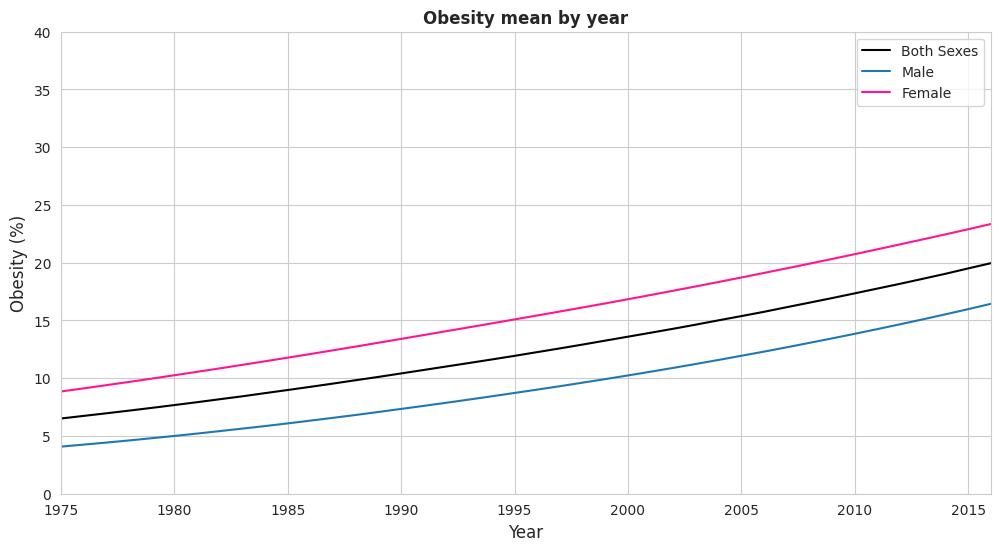

In [342]:
plt.figure(figsize=(12, 6))

with sns.axes_style('whitegrid'):

  graph = sns.lineplot(data = mean_obesity,x ='year',y ='both sexes', label = 'Both Sexes', color = 'black')
  sns.lineplot(data = mean_obesity,x ='year',y ='male',label ='Male', color = '#1F77B4')
  sns.lineplot(data = mean_obesity,x ='year',y ='female',label = 'Female', color = '#FF1493')

  graph.set_title('Obesity mean by year',fontweight = 'bold')
  graph.set_xlabel('Year',fontsize = 12)
  graph.set_ylabel('Obesity (%)', fontsize=12)

  graph.set_xlim(1975, 2016)
  graph.set_ylim(0,40)

In [343]:
# Obesity increase on females from 1975 to 2016

mean_obesity['female'].max() - mean_obesity['female'].min()

14.499999999999996

In [344]:
# Obesity increase on males from 1975 to 2016

mean_obesity['male'].max() - mean_obesity['male'].min()

12.366492146596856

In [345]:
# The diference between female obesity mean  and male obesity mean

mean_obesity['female'].mean() - mean_obesity['male'].mean()

6.200448765893789

In [346]:
mean_hunger = pd.DataFrame()

mean_hunger['Global Hunger mean'] = df_hunger.groupby('Year')['Global Hunger Index (2021)'].mean()

mean_hunger.head()

,Global Hunger mean
Year,
2000,24.439286
2006,21.043478
2012,17.508621
2021,16.790625


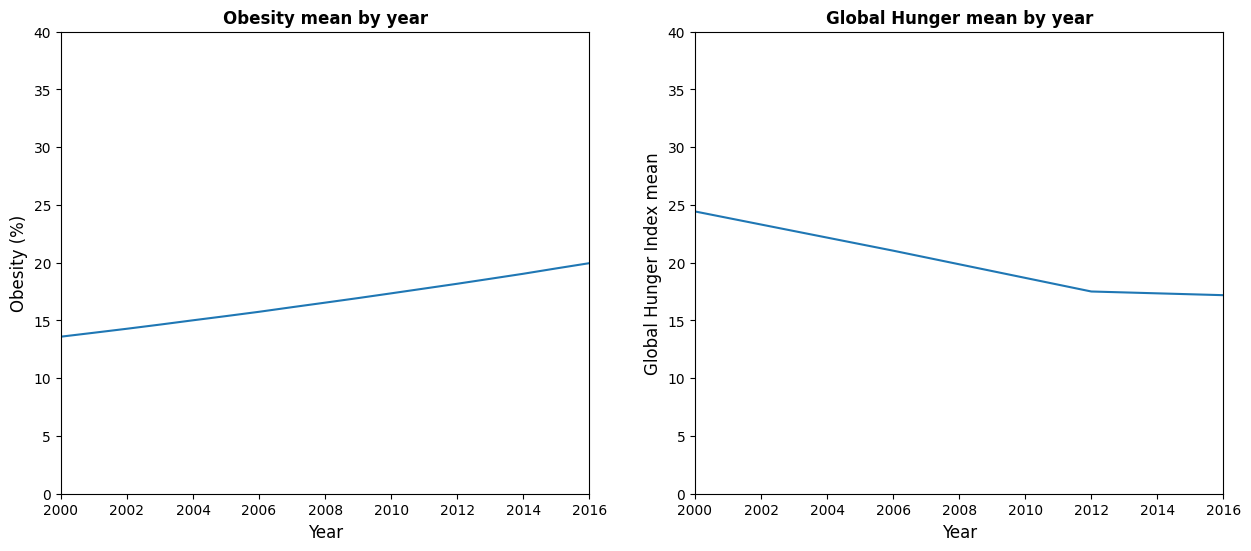

In [347]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

with sns.axes_style('whitegrid'):

  graph1 = sns.lineplot(data=mean_obesity, x='year', y='both sexes', ax=axes[0])

  graph1.set_title('Obesity mean by year', fontweight='bold')
  graph1.set_xlabel('Year', fontsize=12)
  graph1.set_ylabel('Obesity (%)', fontsize=12)

  graph1.set_xlim(2000, 2016)
  graph1.set_ylim(0,40)


with sns.axes_style('whitegrid'):

  graph2 = sns.lineplot(data=mean_hunger, x='Year', y='Global Hunger mean', ax=axes[1])

  graph2.set_title('Global Hunger mean by year', fontweight='bold')
  graph2.set_xlabel('Year', fontsize=12)
  graph2.set_ylabel('Global Hunger Index mean', fontsize=12)

  graph2.set_xlim(2000, 2016)
  graph2.set_ylim(0,40)

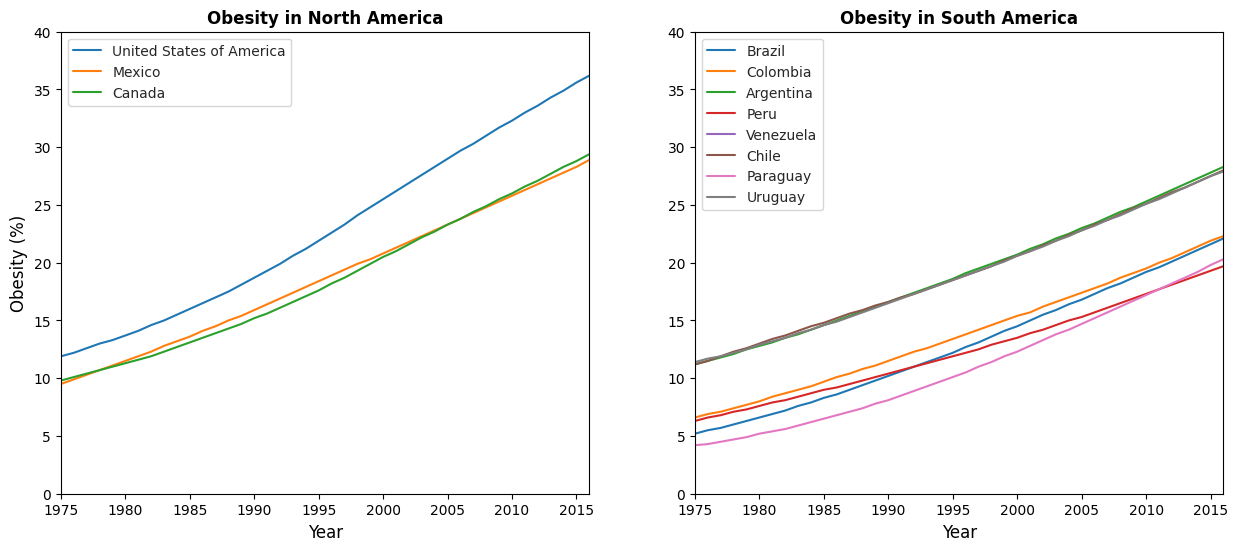

In [348]:
north_america_countries = ["United States of America","Mexico","Canada"]
south_america_countries = ["Brazil","Colombia","Argentina","Peru","Venezuela","Chile","Paraguay","Uruguay"]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

with sns.axes_style('whitegrid'):

  for country in north_america_countries:
    graph1 = sns.lineplot(data=df_obesity[(df_obesity['Country']==country) & (df_obesity['sex']=='Both sexes')], x='year', y='Obesity(%)', label = country, ax=axes[0])

  graph1.set_title('Obesity in North America', fontweight='bold')
  graph1.set_xlabel('Year', fontsize=12)
  graph1.set_ylabel('Obesity (%)', fontsize=12)

  graph1.set_xlim(1975, 2016)
  graph1.set_ylim(0,40)


with sns.axes_style('whitegrid'):

  for country in south_america_countries:
    graph2 = sns.lineplot(data=df_obesity[(df_obesity['Country']==country) & (df_obesity['sex']=='Both sexes')], x='year', y='Obesity(%)', label = country, ax=axes[1])

  graph2.set_title('Obesity in South America', fontweight='bold')
  graph2.set_xlabel('Year', fontsize=12)
  graph2.set_ylabel(' ')

  graph2.set_xlim(1975, 2016)
  graph2.set_ylim(0,40)

In [349]:
# The obesity percentage variation in North America Countries between 1975 and 2016

NA_obesity = df_obesity[(df_obesity['Country'].isin(['United States of America','Mexico','Canada'])) & (df_obesity['sex'] == 'Both sexes') & (df_obesity['year'].isin([1975,2016]))].groupby('Country')['Obesity(%)'].diff().dropna() * -1

NA_countries = {4029: 'Canada', 13983: 'Mexico', 23559: 'United States of America'}

NA_obesity.rename(NA_countries)

Canada                      19.6
Mexico                      19.4
United States of America    24.3
Name: Obesity(%), dtype: float64

In [350]:
# The mean variation in obesity percentage in South America Countries between 1975 and 2016

df_obesity[(df_obesity['Country'].isin(["Brazil","Colombia","Argentina","Peru","Venezuela","Chile","Paraguay","Uruguay"])) & (df_obesity['sex'] == 'Both sexes') & (df_obesity['year'].isin([1975,2016]))].groupby('Country')['Obesity(%)'].diff().dropna().mean() * -1

16.071428571428573

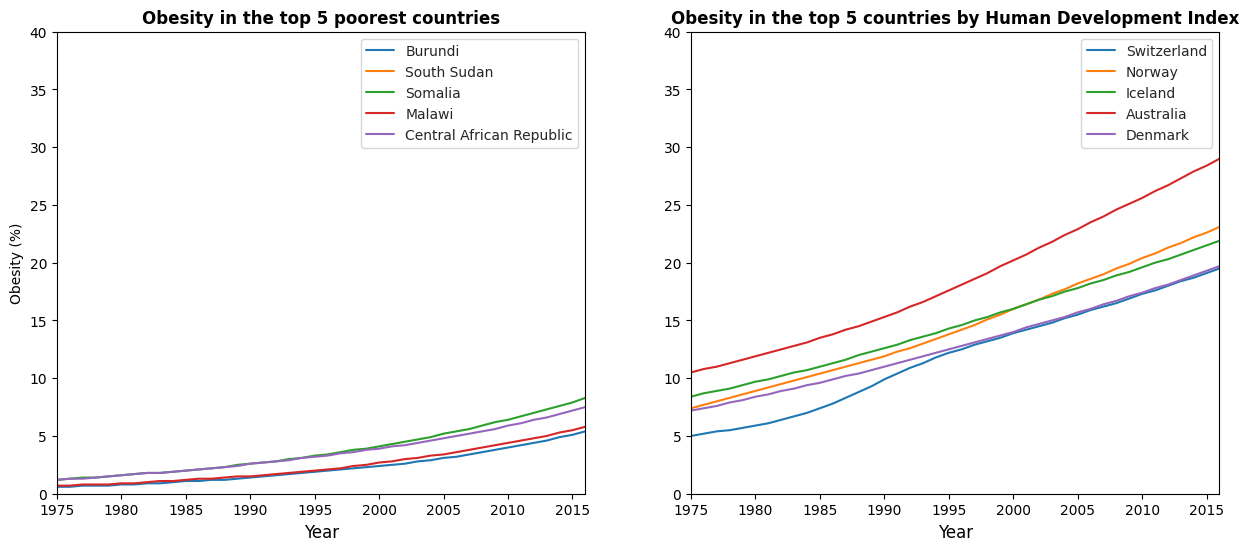

In [351]:
top5_HDI = ['Switzerland','Norway','Iceland','Australia','Denmark']
top5_poorer = ['Burundi','South Sudan','Somalia','Malawi','Central African Republic']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

with sns.axes_style('whitegrid'):

    for country in top5_poorer:
      graph1 = sns.lineplot(data=df_obesity[(df_obesity['Country'] == country) & (df_obesity['sex'] == 'Both sexes')], x='year', y='Obesity(%)',label = country, ax=axes[0])

    graph1.set_title('Obesity in the top 5 poorest countries', fontweight='bold')
    graph1.set_xlabel('Year', fontsize=12)
    graph1.set_ylabel('Obesity (%)')

    graph1.set_xlim(1975, 2016)
    graph1.set_ylim(0,40)

with sns.axes_style('whitegrid'):

    for country in top5_HDI:
      graph2 = sns.lineplot(data=df_obesity[(df_obesity['Country'] == country) & (df_obesity['sex'] == 'Both sexes')], x='year', y='Obesity(%)',label = country, ax=axes[1])

    graph2.set_title('Obesity in the top 5 countries by Human Development Index', fontweight='bold')
    graph2.set_xlabel('Year', fontsize=12)
    graph2.set_ylabel(' ')

    graph2.set_xlim(1975, 2016)
    graph2.set_ylim(0,40)

In [352]:
# The mean variation in obesity percentage in the top 5 poorest countries between 1975 and 2016

df_obesity[(df_obesity['Country'].isin(['Burundi','South Sudan','Somalia','Malawi','Central African Republic'])) & (df_obesity['sex'] == 'Both sexes') & (df_obesity['year'].isin([1975,2016]))].groupby('Country')['Obesity(%)'].diff().dropna().mean() * -1


5.825000000000001

In [353]:
# The mean variation in obesity percentage in the top 5 countries by humam development index(HDI) between 1975 and 2016

df_obesity[(df_obesity['Country'].isin(['Switzerland','Norway','Iceland','Australia','Denmark'])) & (df_obesity['sex'] == 'Both sexes') & (df_obesity['year'].isin([1975,2016]))].groupby('Country')['Obesity(%)'].diff().dropna().mean() * -1


14.940000000000001

In [354]:
df_obesity = df_obesity[df_obesity['sex'] == 'Both sexes']

In [355]:
'''
  Adding a new column to the obesity DataFrame, wich has the number of obese population by the year of the row,
this calculation was made by multiplying the country population(country DataFrame) and the obesity percentage(obesity DataFrame)

'''
df_obesity['Obese Population'] = df_obesity.apply(lambda row: (row['Obesity(%)'] / 100) * df_country[(df_country['Country'] == row['Country'])][str(row['year'])].values[0] if not df_country[(df_country['Country'] == row['Country'])][str(row['year'])].empty else 0, axis=1).dropna()


In [356]:
df_obesity = df_obesity.sort_values(by='Obese Population',ascending=False)

obese_countries = df_obesity[(df_obesity['Obese Population'] > df_obesity['Obese Population'].mean()*10)]['Country'].unique()

obese_countries

array(['United States of America', 'China', 'India', 'Brazil', 'Mexico',
       'Russian Federation', 'Turkey'], dtype=object)

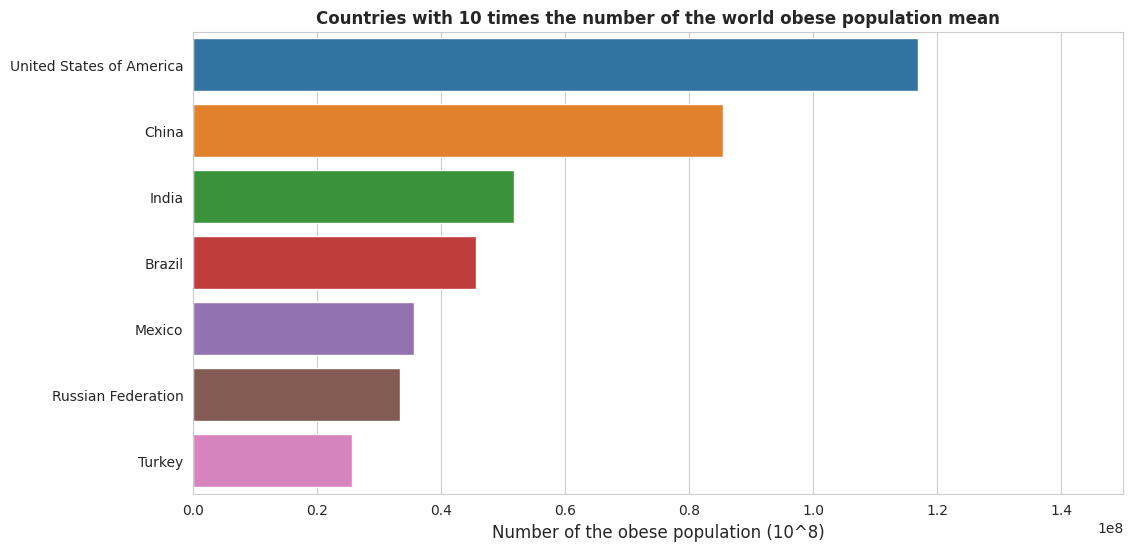

In [357]:
plt.figure(figsize=(12, 6))

with sns.axes_style('whitegrid'):

    for country in obese_countries:
      graph = sns.barplot(data=df_obesity[(df_obesity['year'] == 2016) & (df_obesity['Country'] == country)], x = 'Obese Population', y='Country')

    graph.set_title('Countries with 10 times the number of the world obese population mean', fontweight='bold')
    graph.set_xlabel('Number of the obese population (10^8)', fontsize=12)
    graph.set_ylabel('', fontsize=12)

    graph.set_xlim(0,15*10**7)


In [358]:
half_obese = df_obesity[df_obesity['Obesity(%)'] > 50].sort_values(by='Obesity(%)', ascending=False)['Country'].unique()

half_obese

array(['Nauru', 'Cook Islands', 'Palau', 'Marshall Islands', 'Tuvalu'],
      dtype=object)

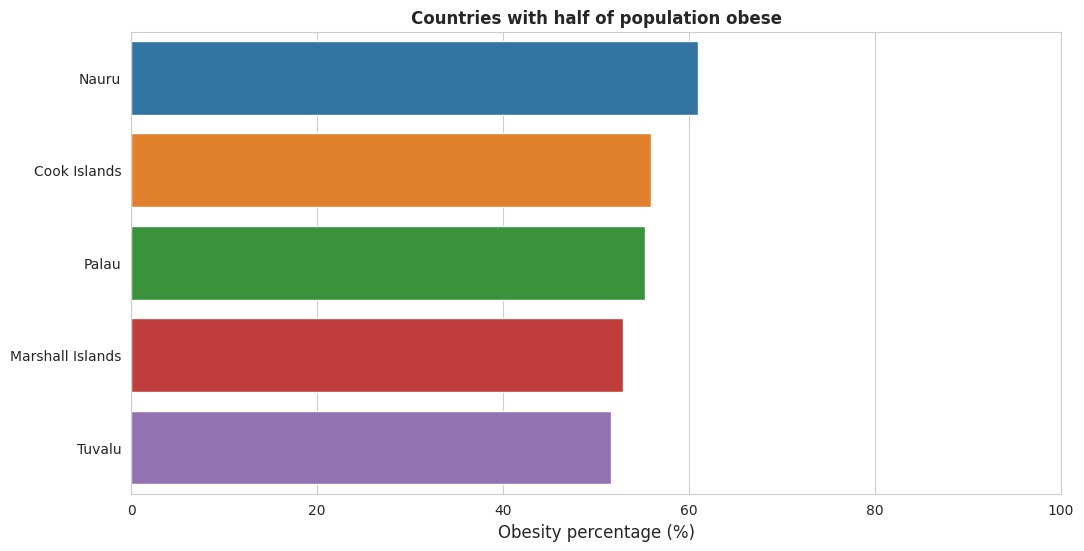

In [360]:
plt.figure(figsize=(12, 6))

with sns.axes_style('whitegrid'):

    for country in half_obese:
      graph = sns.barplot(data=df_obesity[(df_obesity['year'] == 2016) & (df_obesity['Country'] == country)], x = 'Obesity(%)', y='Country')

    graph.set_title('Countries with half of population obese', fontweight='bold')
    graph.set_xlabel('Obesity percentage (%)', fontsize=12)
    graph.set_ylabel('', fontsize=12)

    graph.set_xlim(0,100)

# Insights

* Even though the obesity percentage keeps rising throughout the years, females have 6.02% higher tendency to be obese than men do
* From 1975 to 2016:
  * Female obesity mean increased **14.5%**
  * Male obesity mean incresead **12.3%**
  * In the United States of America, Canada, and Mexico, the obesity percentage for both sexes increased by **24.3%**, **19.6%** and **19.4%**, respectively
  * In South America, the obesity percentage mean increased **16%**
  * In the top 5 poorest countries according to International Monetary Fund (IMF), the mean variation in obesity percentage increased **5.82%**
  * In the top 5 contries according to the Human Development Index(HDI), the mean variation in obesity percentage increased **14.95%**
* There are 7 countries whose obese population is higher than 10 times the worlds obese populaton mean, they are, from highest to lowest: the United States of America, China, India, Brazil, Mexico, the Russia Federation, Turkey
* There are 5 countries where the obese population constitutes more than half of its total population, they are, from the highest obesity percentage to the lowest: Nauru, Cook Islands, Palau, Marshall Islands and Tuvalu

# References

* Obesity among adults dataset: https://apps.who.int/gho/data/node.main.A900A?lang=en
* Country population dataset: https://www.kaggle.com/datasets/mohitkr05/country-population-from-1960-to-2018
* top 5 contries according to HDI: https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index
* Top 10 Poorest Countries in the World: https://gfmag.com/data/economic-data/poorest-country-in-the-world/